In [50]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

print(data.shape)
print(target.shape)

(209, 2500)
(209,)


In [51]:
import collections
print(collections.Counter(target))

Counter({0: 109, 1: 100})


In [52]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.3)

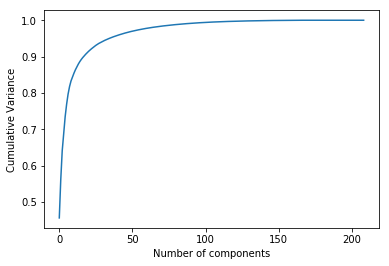

In [53]:
#Deciding the number of components to use with PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance')

plt.show()

In [54]:
#Creating the pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=100, whiten=True, random_state=42)
svc = SVC()

model = make_pipeline(pca, svc)

In [55]:
#Training
model.fit(train_data, train_target)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=100, random_state=42,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [56]:
#Measuring accuracy
from sklearn.metrics import accuracy_score

attempted_target = model.predict(test_data)
acc = accuracy_score(test_target, attempted_target)
print(acc)

1.0


In [57]:
from sklearn.metrics import classification_report

print(classification_report(test_target, attempted_target, target_names=['Fabio', 'Paolo']))

             precision    recall  f1-score   support

      Fabio       1.00      1.00      1.00        35
      Paolo       1.00      1.00      1.00        28

avg / total       1.00      1.00      1.00        63



In [59]:
#Saving the model
import joblib

#joblib.dump(model, 'SVM-Face_Recognition.sav')
joblib.dump(model, 'SVM-FaceTest.sav')

['SVM-FaceTest.sav']